<a href="https://colab.research.google.com/github/ThuoM/Restaurant-Recommender-System/blob/pesh/restaurants_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Understanding<br>

Check the shape, general infornation about the data sets such as data types overall number of columns and rows:

Import the necessary data manipulation and visualization libraries i.e. pandas, matloplib

## Import the relevant libraries

In [1]:
from ast import increment_lineno
#data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('darkgrid')

## Load the data

In [3]:
#create path to data
path = 'https://raw.githubusercontent.com/ThuoM/Restaurant-Recommender-System/main/'

<strong>Restaurants Data</strong>

In [4]:
#load restaurant data
restaurants = pd.read_csv(path+'restaurant_data1.csv')
#display the first 5 rows
restaurants.head()

,Restaurant ID,Name,Rating,Pricing,URL,Latitude,Longitude,Transactions,Location,Phone,Display Phone,Distance,Reviews,Review Count,Cuisine,Number of Reviews,image_url
0,nMyot99PkX5iYCdxHoRJqQ,ARIARI,5,NaN,https://www.yelp.com/biz/ariari-new-york?adjus...,40.727284,-73.985831,[],"['119 1st Ave', 'New York, NY 10003']",1.646423e+10,(646) 422-7466,2301.808064,"[{'text': ""As a Korean person, I can confident...",3,Korean,100,https://s3-media1.fl.yelpcdn.com/bphoto/x5UIZS...
1,HaDG1Ymi8NVapPBfF4Uqiw,Trust Bae,5,$$$$,https://www.yelp.com/biz/trust-bae-new-york-2?...,40.746331,-73.988287,[],"['1204 Broadway', 'New York, NY 10001']",1.917269e+10,(917) 268-7268,4415.973378,[{'text': 'I went to Trust Bae for date night ...,3,Japanese,6,https://s3-media2.fl.yelpcdn.com/bphoto/rVw5us...
2,owYYuyLvlsdjLz68c3SSfg,Taboonette,4,$$,https://www.yelp.com/biz/taboonette-new-york?a...,40.734604,-73.992828,"['pickup', 'delivery']","['30 E 13th St', 'New York, NY 10003']",1.212511e+10,(212) 510-7881,3260.394715,[{'text': 'I absolutely loved my meal at this ...,3,Mediterranean,991,https://s3-media1.fl.yelpcdn.com/bphoto/5HaWSD...
3,5F9kZPnAleDYqCeCyvGJPA,Bad Roman,5,NaN,https://www.yelp.com/biz/bad-roman-new-york?ad...,40.768494,-73.983072,[],"['10 Columbus Cir', 'New York, NY 10019']",1.212970e+10,(212) 970-2033,6825.276822,[{'text': 'Immaculate vibes and the coolest ba...,3,American (New),86,https://s3-media3.fl.yelpcdn.com/bphoto/cU7SyN...
4,6GAB0Rn6eBqCUO9Tx9BNgQ,bōm,5,NaN,https://www.yelp.com/biz/b%C5%8Dm-new-york-3?a...,40.739660,-73.992470,[],"['17 W 19th St', 'New York, NY 10011']",1.212256e+10,(212) 256-1368,3780.864904,"[{'text': ""Bōm is the new Korean meat-forward ...",2,Korean,2,https://s3-media2.fl.yelpcdn.com/bphoto/OxNjui...


<strong>Check the general information of  the restaurants dataset<strong>

In [5]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant ID      500 non-null    object 
 1   Name               500 non-null    object 
 2   Rating             500 non-null    int64  
 3   Pricing            327 non-null    object 
 4   URL                500 non-null    object 
 5   Latitude           500 non-null    float64
 6   Longitude          500 non-null    float64
 7   Transactions       500 non-null    object 
 8   Location           500 non-null    object 
 9   Phone              443 non-null    float64
 10  Display Phone      443 non-null    object 
 11  Distance           500 non-null    float64
 12  Reviews            500 non-null    object 
 13  Review Count       500 non-null    int64  
 14  Cuisine            500 non-null    object 
 15  Number of Reviews  500 non-null    int64  
 16  image_url          500 non

We note that the data has 17 columns  and 500 rows.<br>
We have missing values in the phone,display phone and priceing.<br>

We will look further on ways to impute<br>

<strong>Display the data types of the dataset</strong>

In [6]:
restaurants.dtypes.value_counts().to_frame()

,0
object,10
float64,4
int64,3


Most columns are of type of object, only seven are numerical

<strong>Check the statistical summary of the dataset</strong>

In [7]:
restaurants.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,500.0,4.112000e+00,1.053411e+00,1.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00
Latitude,500.0,4.072298e+01,2.270689e-02,4.065794e+01,4.071250e+01,4.072230e+01,4.073931e+01,4.076983e+01
Longitude,500.0,-7.398328e+01,1.940457e-02,-7.401788e+01,-7.399717e+01,-7.398797e+01,-7.397083e+01,-7.390008e+01
Phone,443.0,1.519129e+10,2.692814e+09,1.212201e+10,1.212759e+10,1.646476e+10,1.718506e+10,1.973799e+10
Distance,500.0,3.196599e+03,1.418040e+03,8.154086e+02,2.088268e+03,2.896165e+03,4.168978e+03,7.943011e+03
Review Count,500.0,2.988000e+00,1.410524e-01,1.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
Number of Reviews,500.0,5.088320e+02,8.755115e+02,1.000000e+00,5.250000e+01,1.780000e+02,5.875000e+02,6.750000e+03


There may be outliers present as the maximum value is much larger than the mean and the standard deviation is high. However, this would require further investigation and analysis to determine whether these values are truly outliers.

<strong>Investigate presence of outliers</strong>

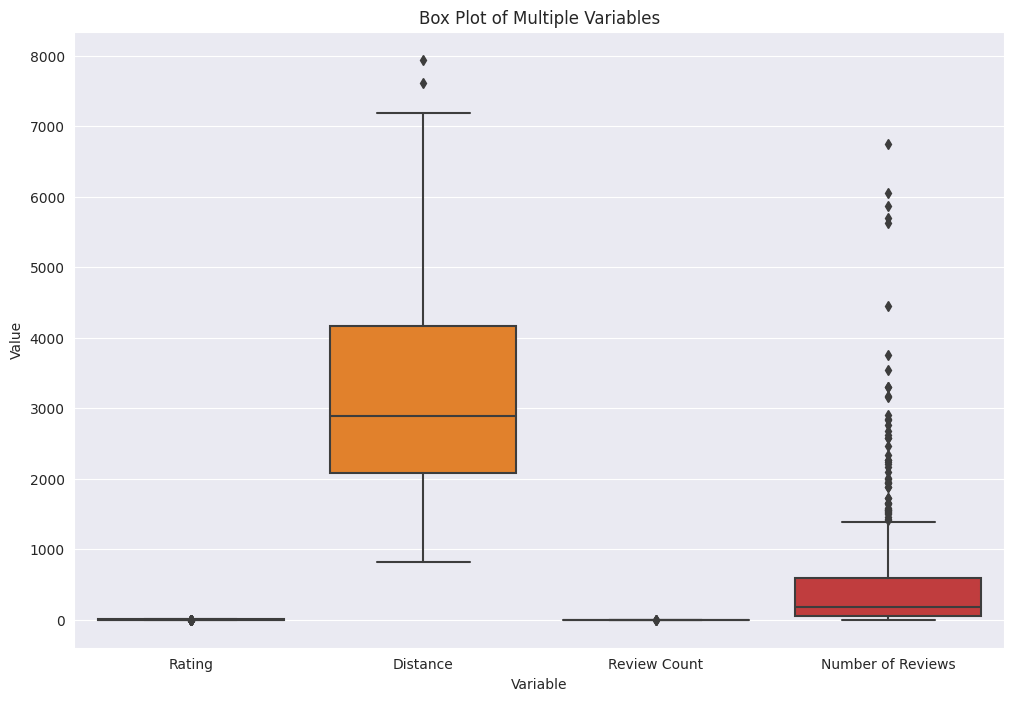

In [8]:
# create a grouped box plot with seaborn
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=restaurants[['Rating', 'Distance', 'Review Count', 'Number of Reviews']], ax=ax)
ax.set_title('Box Plot of Multiple Variables')
ax.set_xlabel('Variable')
ax.set_ylabel('Value')
plt.show()


Outliers are noted on Number of reviews columns, we need to investigate whether its related to the number of customers the restaurant serves or not.

<strong>Reviews Data</strong>

In [9]:
reviews = pd.read_csv(path+'final_revs.csv')
# assign columns to the dataset
reviews.columns = ['User_Name','User_id','Location','Date_of_review','User_Rating','Comment','URL']
#display the first 5 rows
reviews.head()

,User_Name,User_id,Location,Date_of_review,User_Rating,Comment,URL
0,Elisa H.,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
1,Morlene C.,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
2,Ruwan J.,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...
3,Mike C.,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,"Forest Hills, NY",12/14/2022,5.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
4,Brad M.,/user_details?userid=IMD57wrCtAPbvBSAlI2nkA,"Princeton, NJ",1/10/2023,5.0,Great venue. The various vendors have amazing ...,https://www.yelp.com/biz/urbanspace-union-squa...


<strong>Check the general information of  the reviews dataset<strong>

In [10]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188714 entries, 0 to 188713
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   User_Name       188714 non-null  object 
 1   User_id         188714 non-null  object 
 2   Location        188714 non-null  object 
 3   Date_of_review  188714 non-null  object 
 4   User_Rating     188714 non-null  float64
 5   Comment         188714 non-null  object 
 6   URL             188714 non-null  object 
dtypes: float64(1), object(6)
memory usage: 10.1+ MB


we do not have missing values in our dataset.<br>
We have 188,714 rows and 7 columns<br>
we have 6 object datatypes with 1 float

<strong>Display statistical summary</strong>

In [11]:
reviews.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User_Rating,188714.0,4.175753,1.132427,1.0,4.0,5.0,5.0,5.0


The User_Rating variable has a mean of 4.175753 and a standard deviation of 1.132427, indicating that the ratings in the sample vary somewhat from the mean. Most of the ratings (75%) are 5.0 or lower, with a median of 5.0. The minimum rating in the sample is 1.0, while the maximum rating is 5.0.

<strong>Inspect the presnce of outliers</strong>

In [12]:
#check for outliers in user_rating columnu sing the interquatile range calculation
Q1, Q3 = np.percentile(reviews['User_Rating'], [25,75]) 
IQR = Q3-Q1 
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is 2.5
up_limit is 6.5


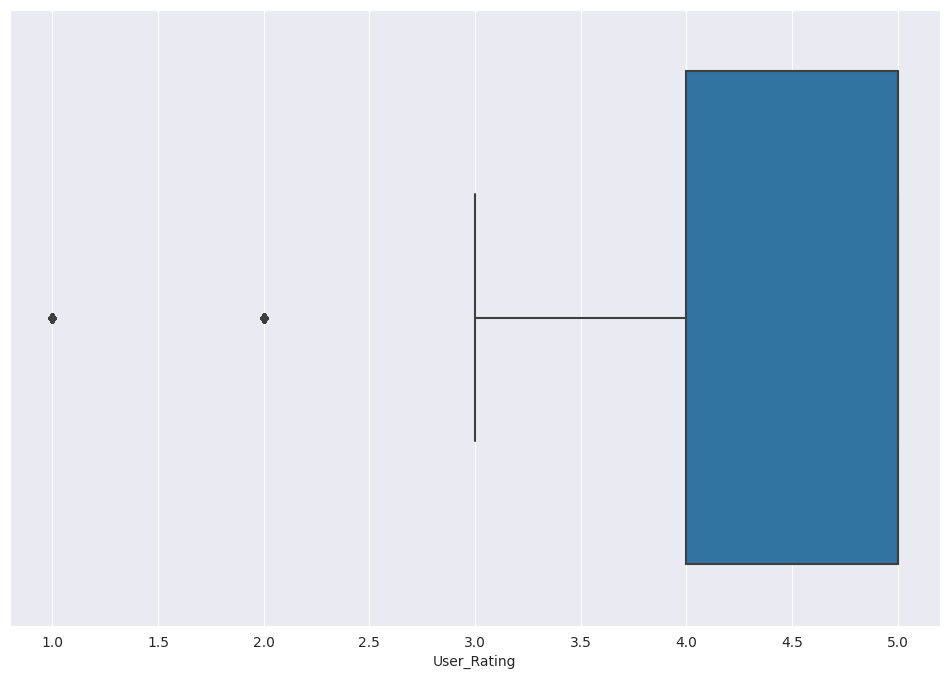

In [13]:
#boxplot for User_rating column
plt.figure(figsize=(12,8))
sns.boxplot(x = reviews['User_Rating']);

There is minimal outliers on the lower side of the interquatile range fence

## Data Preparation<br>
check and handle missing values in the two datasets:
* restuarants
* reviews



<strong>restuarants dataset</strong>


In [14]:
restaurants.isna().sum()

Restaurant ID          0
Name                   0
Rating                 0
Pricing              173
URL                    0
Latitude               0
Longitude              0
Transactions           0
Location               0
Phone                 57
Display Phone         57
Distance               0
Reviews                0
Review Count           0
Cuisine                0
Number of Reviews      0
image_url              0
dtype: int64

We have 173 missing values in the dataset for the pricing column. Lets do a value_counts on the pricing column to see the unique values

In [15]:
restaurants['Pricing'].value_counts().to_frame()

,Pricing
$$,222
$$$,62
$,23
$$$$,20


We note that most restaurants have a $$ pricing. We just go ahead and replace the missing values with the mode(since its the datatype is of type string). This is because price is of products within a certain locality seem to be more or less similar most of the time.

In [16]:
# Calculate the mode of the column
mode = restaurants['Pricing'].mode()[0]

# Replace missing values with mode
restaurants['Pricing'].fillna(mode, inplace=True)

In [17]:
#confirm that there are no missing values in the pricing column 
restaurants.isna().sum()

Restaurant ID         0
Name                  0
Rating                0
Pricing               0
URL                   0
Latitude              0
Longitude             0
Transactions          0
Location              0
Phone                57
Display Phone        57
Distance              0
Reviews               0
Review Count          0
Cuisine               0
Number of Reviews     0
image_url             0
dtype: int64

Since we cannot guess a phone number, lets replace the missing values with "Missing"


In [18]:
# Replace missing values with in Display phone with "missing"
restaurants['Display Phone'].fillna('missing', inplace=True)

In [19]:
#confirm that there are no missing values in the display phone column 
restaurants.isna().sum()

Restaurant ID         0
Name                  0
Rating                0
Pricing               0
URL                   0
Latitude              0
Longitude             0
Transactions          0
Location              0
Phone                57
Display Phone         0
Distance              0
Reviews               0
Review Count          0
Cuisine               0
Number of Reviews     0
image_url             0
dtype: int64

In [20]:
# Replace missing values with "missing"
restaurants['Phone'].fillna('missing', inplace=True)

In [21]:
#confirm that there are no missing values in the display phone column 
restaurants.isna().sum()

Restaurant ID        0
Name                 0
Rating               0
Pricing              0
URL                  0
Latitude             0
Longitude            0
Transactions         0
Location             0
Phone                0
Display Phone        0
Distance             0
Reviews              0
Review Count         0
Cuisine              0
Number of Reviews    0
image_url            0
dtype: int64

<strong>reviews dataset</strong>

In [22]:
#check for missing values
reviews.isna().sum()

User_Name         0
User_id           0
Location          0
Date_of_review    0
User_Rating       0
Comment           0
URL               0
dtype: int64

There are no missing values in the  reviews dataset

### Dataset Merging

To get the restauarants' personalized reviews and ratings, we have to merge our reviews and the restaurant datasets

In [23]:
#create a new dataset of merged datasets
restaurant_reviews = restaurants.merge(reviews, on='URL')

In [24]:
#display first 5 restaurants 
restaurant_reviews.head()

,Restaurant ID,Name,Rating,Pricing,URL,Latitude,Longitude,Transactions,Location_x,Phone,...,Review Count,Cuisine,Number of Reviews,image_url,User_Name,User_id,Location_y,Date_of_review,User_Rating,Comment
0,nMyot99PkX5iYCdxHoRJqQ,ARIARI,5,$$,https://www.yelp.com/biz/ariari-new-york?adjus...,40.727284,-73.985831,[],"['119 1st Ave', 'New York, NY 10003']",16464227466.0,...,3,Korean,100,https://s3-media1.fl.yelpcdn.com/bphoto/x5UIZS...,esther h.,/user_details?userid=b5qg4CHJPwBjQ8d4m5w6oQ,"Midtown East, New York, NY",3/9/2023,5.0,No comment
1,nMyot99PkX5iYCdxHoRJqQ,ARIARI,5,$$,https://www.yelp.com/biz/ariari-new-york?adjus...,40.727284,-73.985831,[],"['119 1st Ave', 'New York, NY 10003']",16464227466.0,...,3,Korean,100,https://s3-media1.fl.yelpcdn.com/bphoto/x5UIZS...,Amy J.,/user_details?userid=pZmMNfQ85FvLiKJ-UgWY0A,"NJ, NJ",2/22/2023,5.0,"THIS PLACE IS AMAZING. Great service, kind sta..."
2,nMyot99PkX5iYCdxHoRJqQ,ARIARI,5,$$,https://www.yelp.com/biz/ariari-new-york?adjus...,40.727284,-73.985831,[],"['119 1st Ave', 'New York, NY 10003']",16464227466.0,...,3,Korean,100,https://s3-media1.fl.yelpcdn.com/bphoto/x5UIZS...,Najin K.,/user_details?userid=vg6xN-nDv2A8P3UskAK_WA,"Manhattan, NY",4/1/2023,5.0,No comment
3,nMyot99PkX5iYCdxHoRJqQ,ARIARI,5,$$,https://www.yelp.com/biz/ariari-new-york?adjus...,40.727284,-73.985831,[],"['119 1st Ave', 'New York, NY 10003']",16464227466.0,...,3,Korean,100,https://s3-media1.fl.yelpcdn.com/bphoto/x5UIZS...,David A.,/user_details?userid=xAXjMh_tWvyPS1a957Dk9w,"New York, NY",4/8/2023,4.0,No comment
4,nMyot99PkX5iYCdxHoRJqQ,ARIARI,5,$$,https://www.yelp.com/biz/ariari-new-york?adjus...,40.727284,-73.985831,[],"['119 1st Ave', 'New York, NY 10003']",16464227466.0,...,3,Korean,100,https://s3-media1.fl.yelpcdn.com/bphoto/x5UIZS...,Ye Z.,/user_details?userid=kWGFN5NRAfuDqvkbWuGo8A,"New York, NY",4/4/2023,4.0,No comment


<strong>Check the shape of the merged dataset</strong>

In [25]:
restaurant_reviews.shape

(128674, 23)

We have 128674 rows and 23 columns.

<strong>Lets check for missing values</strong>

In [26]:
restaurant_reviews.isna().sum()

Restaurant ID        0
Name                 0
Rating               0
Pricing              0
URL                  0
Latitude             0
Longitude            0
Transactions         0
Location_x           0
Phone                0
Display Phone        0
Distance             0
Reviews              0
Review Count         0
Cuisine              0
Number of Reviews    0
image_url            0
User_Name            0
User_id              0
Location_y           0
Date_of_review       0
User_Rating          0
Comment              0
dtype: int64

We do not have missing values.

## Exploratory Data Analysis<br>

Here we will look at univariate, bivariate and multivariate data analysis using visualizations.


Univariate

In [27]:
restaurant_reviews.sample(10)

,Restaurant ID,Name,Rating,Pricing,URL,Latitude,Longitude,Transactions,Location_x,Phone,...,Review Count,Cuisine,Number of Reviews,image_url,User_Name,User_id,Location_y,Date_of_review,User_Rating,Comment
83822,-J8VuX3wGrYSOBu2G0hMsw,Katsu-Hama,2,$$,https://www.yelp.com/biz/katsu-hama-new-york?a...,40.756380,-73.977590,"['delivery', 'pickup', 'restaurant_reservation']","['11 E 47th St', 'New York, NY 10017']",12127585909.0,...,3,Japanese,1566,https://s3-media2.fl.yelpcdn.com/bphoto/6tSHNH...,Sho I.,/user_details?userid=eX88h6QbMgkD80rYIhPIow,"Somers, NY",11/5/2019,5.0,No comment
59169,4yPqqJDJOQX69gC66YUDkA,Peter Luger,4,$$$$,https://www.yelp.com/biz/peter-luger-brooklyn-...,40.709945,-73.962478,[],"['178 Broadway', 'Brooklyn, NY 11211']",17183877400.0,...,3,Steakhouses,6750,https://s3-media1.fl.yelpcdn.com/bphoto/d0XSKE...,Andy D.,/user_details?userid=-5k9-m9hYDHW_Yt1FO8-GQ,"New York, NY",10/6/2020,4.0,Tried it just because it's famous but really i...
86784,SULHf6nGQ8sK0UpG1XU30w,Los Tacos No.1,4,$,https://www.yelp.com/biz/los-tacos-no-1-new-yo...,40.757507,-73.987772,['delivery'],"['229 W 43rd St', 'New York, NY 10036']",12125744696.0,...,3,Tacos,2676,https://s3-media4.fl.yelpcdn.com/bphoto/5wEe4F...,Jovanna T.,/user_details?userid=zhi7BULsxXtDjW_AHcn8RA,"West Babylon, NY",6/23/2019,4.0,No comment
40682,flcy6dNr4s12PTv6VtBK9Q,LĒNA,5,$$,https://www.yelp.com/biz/l%C4%93na-new-york-8?...,40.719135,-73.991758,"['pickup', 'delivery']","['137 Eldridge St', 'New York, NY 10002']",13479351897.0,...,3,French,219,https://s3-media1.fl.yelpcdn.com/bphoto/flBHYk...,Cedric L.,/user_details?userid=48TnIBDDAGfjy7_Y_zp9xA,"Manhattan, NY",12/7/2017,5.0,Pierre the owner is very welcoming. His staff ...
114851,XPbcjRWxumT4ZQr-7uqOAw,Los Tacos No.1,5,$,https://www.yelp.com/biz/los-tacos-no-1-new-yo...,40.726157,-73.994663,[],"['340 Lafayette St', 'New York, NY 10012']",missing,...,3,Tacos,106,https://s3-media1.fl.yelpcdn.com/bphoto/4abEK0...,Christine D.,/user_details?userid=xf-W0wsG5Uqgr3K3b-XxCA,"North Valley, San Jose, CA",9/24/2022,5.0,No comment
106836,zo4mcEfVKaktdj_gnSFhGQ,Cafe Katja,5,$$,https://www.yelp.com/biz/cafe-katja-new-york?a...,40.717767,-73.990589,"['delivery', 'pickup']","['79 Orchard St', 'New York, NY 10002']",12122199545.0,...,3,German,832,https://s3-media1.fl.yelpcdn.com/bphoto/SowEwj...,Molly S.,/user_details?userid=J14oJF2LbCZDamAUgwv-RQ,"Astoria, NY",7/4/2010,4.0,No comment
116500,SmLFW1Ncg26KfVRVX3GVFQ,Little Mad,3,$$$$,https://www.yelp.com/biz/little-mad-new-york-2...,40.745020,-73.985130,[],"['110 Madison Ave', 'New York, NY 10016']",19172614969.0,...,3,American (New),170,https://s3-media2.fl.yelpcdn.com/bphoto/jgG9F5...,Eric S.,/user_details?userid=kL46kIcJ0OvgIiKXXJVxUg,"San Jose, CA",3/28/2022,5.0,Chef Sols restaurant is a masterpiece of fine ...
110470,TQzGf4k3HXyMbnNkYKKQSw,Oxalis,5,$$$$,https://www.yelp.com/biz/oxalis-brooklyn?adjus...,40.673109,-73.962628,"['delivery', 'pickup']","['791 Washington Ave', 'Brooklyn, NY 11238']",13476278298.0,...,3,French,231,https://s3-media3.fl.yelpcdn.com/bphoto/6Yw9Aw...,Randall M.,/user_details?userid=15HaL59Vtq1KkRaPfkYDEA,"Manhattan, New York, NY",4/26/2019,3.0,I dined at Oxalis shortly after the NY Times r...
13242,m1cJLpDN4B-_0hGgPfe5OA,Salt + Charcoal,5,$$,https://www.yelp.com/biz/salt-charcoal-brookly...,40.714530,-73.961351,"['pickup', 'delivery', 'restaurant_reservation']","['171 Grand St', 'Brooklyn, NY 11249']",17187822087.0,...,3,Japanese,709,https://s3-media3.fl.yelpcdn.com/bphoto/VpwIpQ...,Monica R.,/user_details?userid=LkeAETMQGOxM--TxUD-bIg,"Orlando, FL",5/16/2017,2.0,No comment
114494,sEuLm5fQgWkkiYBt6OphWQ,Greenpoint Fish & Lobster,4,$$,https://www.yelp.com/biz/greenpoint-fish-and-l...,40.724128,-73.949120,['pickup'],"['114 Nassau Ave', 'Brooklyn, NY 11222']",17183131913.0,...,3,Seafood,389,https://s3-media2.fl.yelpcdn.com/bphoto/46ATFZ...,Alex Z.,/user_details?userid=Z2PISdtGHThSUUbFccGkrA,"Brooklyn, NY",4/10/2016,2.0,No comment


We note that all the columns in the dataset have been capitalized. We will change this to lower case.


In [28]:
# use applymap() and str.lower() to lowercase every element in the dataframe
restaurant_reviews.columns = restaurant_reviews.columns.str.lower()
restaurant_reviews.head()

,restaurant id,name,rating,pricing,url,latitude,longitude,transactions,location_x,phone,...,review count,cuisine,number of reviews,image_url,user_name,user_id,location_y,date_of_review,user_rating,comment
0,nMyot99PkX5iYCdxHoRJqQ,ARIARI,5,$$,https://www.yelp.com/biz/ariari-new-york?adjus...,40.727284,-73.985831,[],"['119 1st Ave', 'New York, NY 10003']",16464227466.0,...,3,Korean,100,https://s3-media1.fl.yelpcdn.com/bphoto/x5UIZS...,esther h.,/user_details?userid=b5qg4CHJPwBjQ8d4m5w6oQ,"Midtown East, New York, NY",3/9/2023,5.0,No comment
1,nMyot99PkX5iYCdxHoRJqQ,ARIARI,5,$$,https://www.yelp.com/biz/ariari-new-york?adjus...,40.727284,-73.985831,[],"['119 1st Ave', 'New York, NY 10003']",16464227466.0,...,3,Korean,100,https://s3-media1.fl.yelpcdn.com/bphoto/x5UIZS...,Amy J.,/user_details?userid=pZmMNfQ85FvLiKJ-UgWY0A,"NJ, NJ",2/22/2023,5.0,"THIS PLACE IS AMAZING. Great service, kind sta..."
2,nMyot99PkX5iYCdxHoRJqQ,ARIARI,5,$$,https://www.yelp.com/biz/ariari-new-york?adjus...,40.727284,-73.985831,[],"['119 1st Ave', 'New York, NY 10003']",16464227466.0,...,3,Korean,100,https://s3-media1.fl.yelpcdn.com/bphoto/x5UIZS...,Najin K.,/user_details?userid=vg6xN-nDv2A8P3UskAK_WA,"Manhattan, NY",4/1/2023,5.0,No comment
3,nMyot99PkX5iYCdxHoRJqQ,ARIARI,5,$$,https://www.yelp.com/biz/ariari-new-york?adjus...,40.727284,-73.985831,[],"['119 1st Ave', 'New York, NY 10003']",16464227466.0,...,3,Korean,100,https://s3-media1.fl.yelpcdn.com/bphoto/x5UIZS...,David A.,/user_details?userid=xAXjMh_tWvyPS1a957Dk9w,"New York, NY",4/8/2023,4.0,No comment
4,nMyot99PkX5iYCdxHoRJqQ,ARIARI,5,$$,https://www.yelp.com/biz/ariari-new-york?adjus...,40.727284,-73.985831,[],"['119 1st Ave', 'New York, NY 10003']",16464227466.0,...,3,Korean,100,https://s3-media1.fl.yelpcdn.com/bphoto/x5UIZS...,Ye Z.,/user_details?userid=kWGFN5NRAfuDqvkbWuGo8A,"New York, NY",4/4/2023,4.0,No comment


<strong>Check the distribution of ratings</strong>

We will first do a value_counts to check fo unique values and any anomalies in the column

Text(0, 0.5, '%count of ratings')

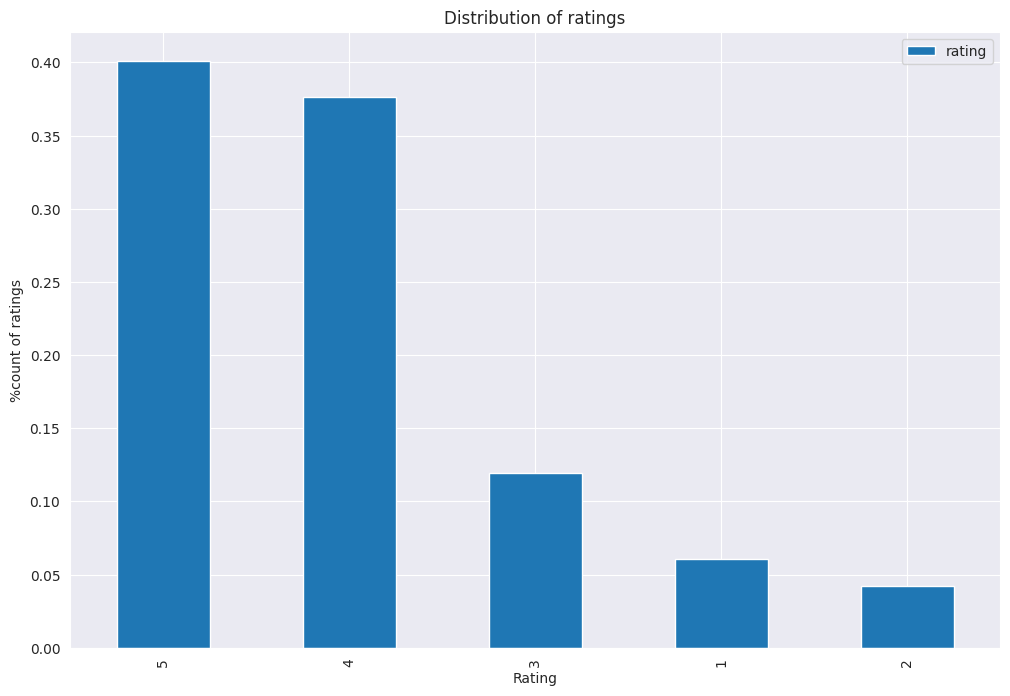

In [29]:
restaurant_reviews['rating'].value_counts(normalize=True).to_frame().plot(kind='bar', figsize=(12, 8))
plt.title("Distribution of ratings")
plt.xlabel('Rating')
plt.ylabel('%count of ratings')

Most restaurants have a rating of 5, 4 and 3. very few have a rating of 2 and one repectively

Distribution of food prices

In [30]:
restaurant_reviews['pricing'].value_counts(normalize=True).to_frame()

,pricing
$$,0.649292
$$$,0.186052
$,0.091199
$$$$,0.073457


we note that our prices are represent by the money sign($). We will change this to below format.
* Mid-range (3 signs)
* Cheap Eats (1 sign)
* Affordable (2 signs)
* Pricey Dining (4 signs)

In [31]:
restaurant_reviews['pricing'].replace(['$$', '$$$$', '$', '$$$'], ['low', 'pricey-dining', 'popular-eats', 'mid-range'], inplace=True)

In [32]:
#confirm the changes
restaurant_reviews['pricing'].value_counts(normalize=True).to_frame()

,pricing
low,0.649292
mid-range,0.186052
popular-eats,0.091199
pricey-dining,0.073457


<strong>Plot a bar to show the price distribution</strong>

Most Restaurants in the dataset have low prices


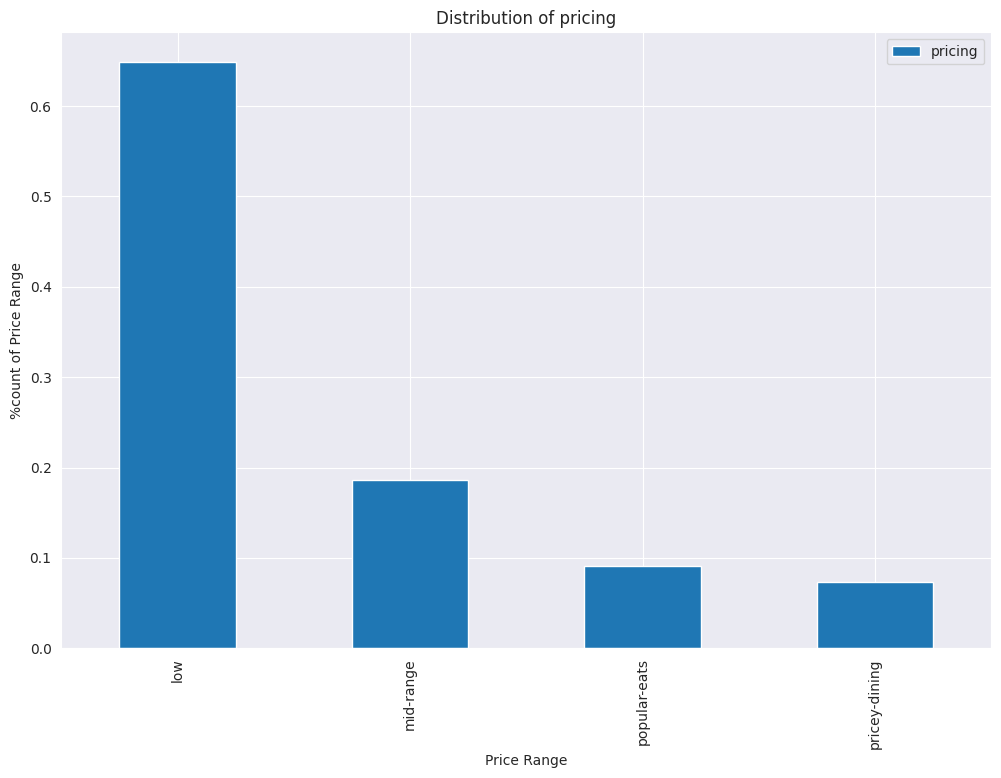

In [33]:
restaurant_reviews['pricing'].value_counts(normalize=True).to_frame().plot(kind='bar', figsize=(12, 8))
plt.title("Distribution of pricing")
plt.xlabel('Price Range')
plt.ylabel('%count of Price Range');

<strong>Plot the trend in review generation</strong>

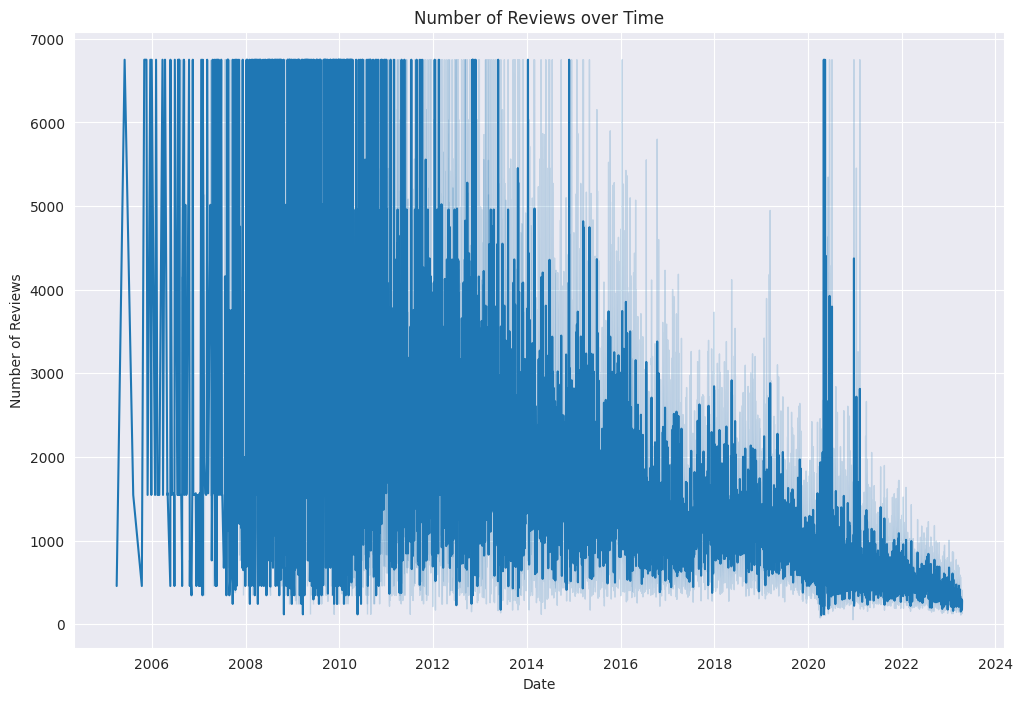

In [43]:
plt.figure(figsize=(12,8))
# create a line plot of the number of reviews over time using Seaborn
sns.lineplot(x='date_of_review', y='number of reviews', data=restaurant_reviews)

# add axis labels and title
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews over Time')
plt.show()

In [38]:
restaurant_reviews.reset_index(inplace=True)